# Clustering 
## Gaussian Mixture Models

### https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse

import seaborn as sns; sns.set()
import numpy as np


from sklearn.datasets.samples_generator import make_blobs

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


# Generalizing E-M: Gaussian Mixture Models
from sklearn.mixture import GaussianMixture as GMM

/Users/metamorphosis/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Creating Toy data

In [3]:
# Generate some data

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

X[:10]

array([[ 0.25006446,  6.48826703],
       [-2.69798647,  2.52194722],
       [-2.90007604,  3.06877291],
       [ 0.70295058,  4.31427482],
       [-2.53563494,  2.38449945],
       [-1.70297829,  7.80540956],
       [ 2.22322228,  0.83877343],
       [ 0.00793137,  4.17614316],
       [-1.79041773,  3.02668532],
       [ 1.76747403,  1.26987864]])

In [4]:
X = X[:, ::-1] # flip axes for better plotting
X[:10]

array([[ 6.48826703,  0.25006446],
       [ 2.52194722, -2.69798647],
       [ 3.06877291, -2.90007604],
       [ 4.31427482,  0.70295058],
       [ 2.38449945, -2.53563494],
       [ 7.80540956, -1.70297829],
       [ 0.83877343,  2.22322228],
       [ 4.17614316,  0.00793137],
       [ 3.02668532, -1.79041773],
       [ 1.26987864,  1.76747403]])

### KMeans 

In [5]:
# Plot the data with K Means Labels

kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)

In [6]:
labels

array([1, 0, 0, 3, 0, 1, 2, 3, 0, 2, 1, 2, 3, 0, 0, 2, 0, 2, 3, 0, 0, 0,
       1, 3, 3, 1, 1, 3, 3, 2, 3, 3, 0, 3, 0, 1, 2, 3, 2, 3, 0, 1, 2, 3,
       2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 3, 2, 2, 0, 2, 2, 2, 2, 3, 0,
       2, 3, 0, 1, 0, 3, 0, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 1, 3, 0, 0, 3,
       0, 2, 0, 2, 3, 0, 0, 1, 3, 2, 2, 2, 1, 2, 3, 3, 0, 1, 3, 1, 2, 0,
       0, 0, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 3, 1, 2, 2, 2, 3, 1, 1,
       1, 0, 3, 0, 1, 3, 1, 0, 3, 0, 0, 1, 0, 2, 3, 0, 2, 0, 2, 3, 2, 3,
       1, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2,
       3, 0, 3, 1, 3, 1, 0, 3, 1, 0, 1, 3, 3, 1, 3, 3, 1, 0, 1, 1, 1, 2,
       2, 3, 3, 0, 2, 2, 1, 3, 0, 1, 3, 1, 3, 3, 2, 2, 1, 2, 3, 1, 2, 1,
       0, 3, 1, 0, 0, 0, 2, 1, 3, 1, 3, 0, 3, 3, 1, 2, 0, 2, 3, 0, 2, 3,
       3, 1, 2, 3, 1, 3, 2, 0, 0, 2, 0, 3, 1, 1, 3, 3, 2, 1, 3, 0, 0, 0,
       1, 3, 3, 3, 3, 3, 2, 3, 3, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 0, 3, 2, 0, 3, 2, 2, 3, 0, 1,

### Plot data 

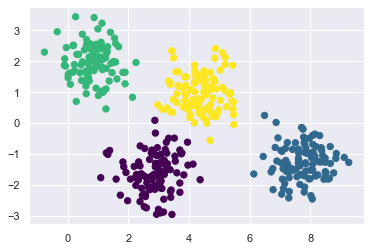

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [8]:
"""


"""

'\n\n\n'

In [9]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

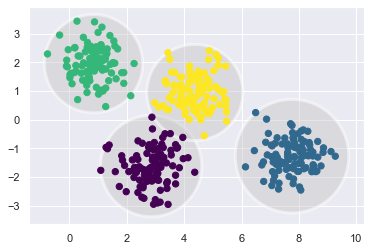

In [10]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [11]:
"""
np.random.RandomState

"""

'\nnp.random.RandomState\n\n'

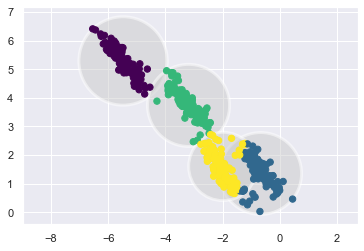

In [12]:
# 

rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

## Generalizing E-M: Gaussian Mixture Models

In [13]:
# GMM

gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)


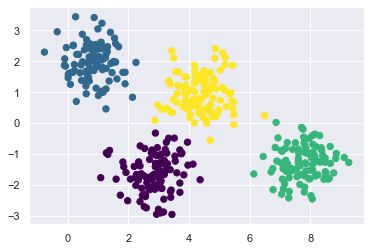

In [14]:
# plot GMM

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [15]:
# probabilistic cluster assignments

probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.469 0.531]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]]


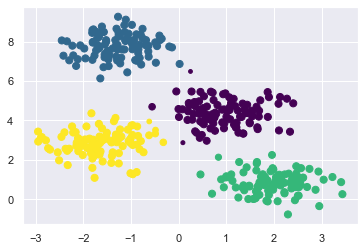

In [24]:
# visualize this uncertainty by, for example, making the size of each point proportional to the certainty of its prediction

size = 50 * probs.max(1) ** 2  # square emphasizes differences

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [ ]:
from matplotlib.patches import Ellipse

In [34]:
# visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

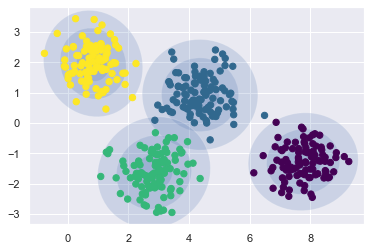

In [35]:
# Previous function does not run, needs to be updated by:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

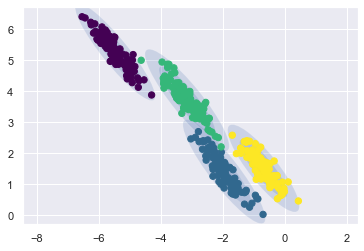

In [36]:
# Previous function does not run, needs to be updated by:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

### Attributes

In [50]:
# probs = gmm.predict_proba(X)

print(probs.shape)
probs.round(3)

(400, 4)


array([[0.   , 0.   , 0.469, 0.531],
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   , 0.   ],
       [0.463, 0.   , 0.   , 0.536],
       [0.   , 1.   , 0.   , 0.   ]])

In [33]:
# Covariances 

gmm.covariances_

array([[[ 0.38494452,  0.02843666],
        [ 0.02843666,  0.37794793]],

       [[ 0.29790222, -0.02463781],
        [-0.02463781,  0.34185172]],

       [[ 0.36544715,  0.01271038],
        [ 0.01271038,  0.28945443]],

       [[ 0.40094166, -0.00447302],
        [-0.00447302,  0.36683582]]])

In [38]:
# precisiona_

gmm.precisions_

array([[[31.72252852, 23.77716912],
        [23.77716912, 21.45063092]],

       [[26.25516104, 18.70707735],
        [18.70707735, 16.50661175]],

       [[24.34802608, 18.01927145],
        [18.01927145, 16.64174593]],

       [[26.4425745 , 18.80051274],
        [18.80051274, 17.86708391]]])

    Precisions:
    The precision matrices for each component in the mixture. A precision
    matrix is the inverse of a covariance matrix. A covariance matrix is
    symmetric positive definite so the mixture of Gaussian can be
    equivalently parameterized by the precision matrices. Storing the
    precision matrices instead of the covariance matrices makes it more
    efficient to compute the log-likelihood of new samples at test time.
    The shape depends on `covariance_type`::

In [37]:
# precisions_cholesky_

gmm.precisions_cholesky_

array([[[2.31656741, 5.13381378],
        [0.        , 4.63148258]],

       [[2.24817217, 4.60444165],
        [0.        , 4.06283297]],

       [[2.19936446, 4.41710562],
        [0.        , 4.07942961]],

       [[2.58067198, 4.44777547],
        [0.        , 4.22694735]]])

In [39]:
# Weights

gmm.weights_

array([0.24857307, 0.24741389, 0.25439375, 0.24961929])

In [40]:
# Means 

gmm.means_

array([[-5.47365516,  5.27446354],
       [-1.95431213,  1.40968809],
       [-3.15134442,  3.71183859],
       [-0.68376734,  1.51593736]])

# GMM as Density Estimation

In [16]:
from sklearn.datasets import make_moons

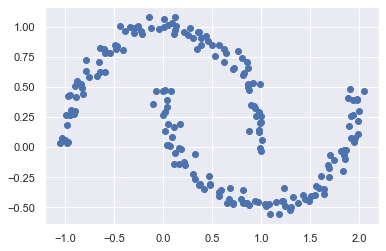

In [29]:
Xmoon, ymoon = make_moons(200, noise=.05, random_state=11)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

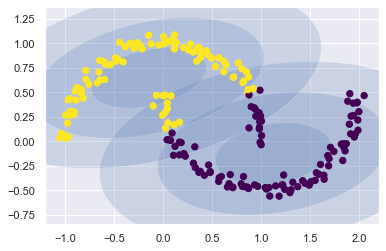

In [41]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)

plot_gmm(gmm2, Xmoon)

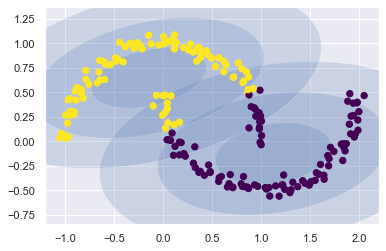

In [42]:
# n_components from 2 to 16

gmm22 = GMM(n_components=16, covariance_type='full', random_state=0)

plot_gmm(gmm2, Xmoon)

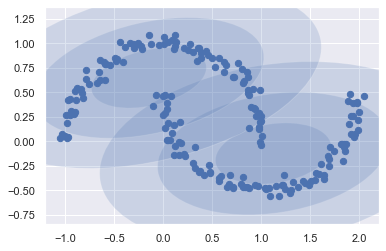

In [44]:
# label True to label False

gmm16 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

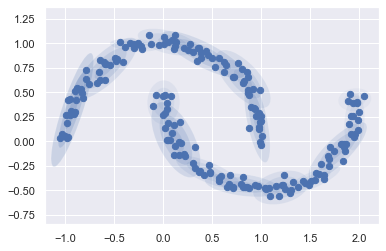

In [43]:
#  more components and ignore the cluster labels

gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

In [53]:
gmm16.predict_proba(X).shape

(400, 2)

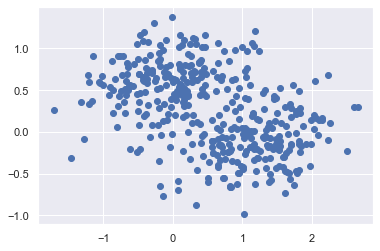

In [75]:
Xnew = gmm16.sample(400)
plt.scatter(Xnew[0][:, 0], Xnew[0][:, 1]);

In [73]:
Xnew[0][:,0]

array([ 0.44233968,  0.06815514,  0.57016749,  1.16442089,  0.97039532,
        0.66884036,  0.84579914,  0.25229388,  0.97791791,  2.5958774 ,
        0.64801248, -0.14658008,  1.10441045,  0.15183637,  1.01388508,
        1.73738662,  1.32031895,  0.34236182,  1.36480399,  1.80605667,
        2.03706051,  1.44314154,  1.82441681,  2.08300668,  1.63209335,
        1.47826126,  1.11940755,  1.06947434,  1.51306856,  1.53538128,
        1.68162502,  1.03682153,  2.06127489,  1.65459709,  0.68731585,
        0.50892958,  0.9174907 ,  1.66235768,  1.30355255,  1.76707981,
        0.91969009,  0.1582764 ,  0.43681086,  1.70436174,  1.3034189 ,
        0.95472117,  0.88003261,  1.03366241,  1.02929063,  0.07615558,
        1.82593381,  1.72340958,  1.40093475, -0.07845717, -0.01919616,
        1.54128201,  1.24329156,  0.57200737,  0.71825801,  0.95198252,
        0.88551805,  1.53866458,  1.29317809,  0.70784806,  1.55108768,
        1.51833103,  1.46576793,  0.79277008,  0.94015668,  1.98

## How many components

https://en.wikipedia.org/wiki/Akaike_information_criterion

https://en.wikipedia.org/wiki/Bayesian_information_criterion
    
    

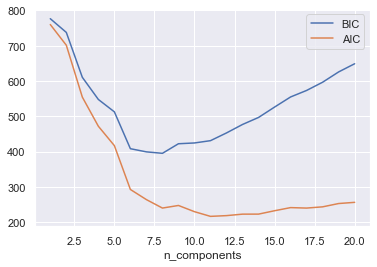

In [76]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

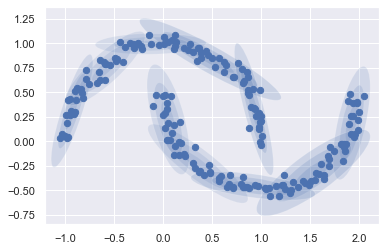

In [88]:
#  using 10 components basted on elbow 

gmm17 = GMM(n_components=10, covariance_type='full', random_state=0)
plot_gmm(gmm17, Xmoon, label=False)

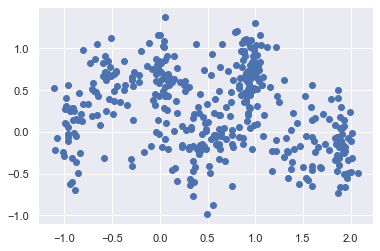

In [91]:
# when generating from previous model we see an issue 

Xnew2 = gmm17.sample(400)
plt.scatter(Xnew2[0][:, 0], Xnew[0][:, 1]);